## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [52]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [53]:
train, test = keras.datasets.cifar10.load_data()

In [54]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [55]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [56]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, regularizer, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [57]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [
    1e-2, 
    1e-4, 
    1e-8, 
    #1e-12
]
regularizers ={
    'L1':l1,
    'l1_l2':l1_l2
}

In [58]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for key, regulizer in regularizers.items():
    for regulizer_ratio in L1_L2_EXP:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print(str(key) + "Experiment with Regulizer = %.6f" % (regulizer_ratio))
            model = build_mlp(input_shape=x_train.shape[1:], regularizer=regulizer(regulizer_ratio))
            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(x_test, y_test), 
                      shuffle=True)

            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]

            exp_name_tag = str(key) + "exp-l2-%s" % str(regulizer_ratio)
            results[exp_name_tag] = {'train-loss': train_loss,
                                     'valid-loss': valid_loss,
                                     'train-acc': train_acc,
                                     'valid-acc': valid_acc}



L1Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

50000/50000 [==============================] - 7s 141us/step - loss: 4.5737 - acc: 0.5087 - val_loss: 4.5930 - val_acc: 0.4904
Epoch 15/30
50000/50000 [==============================] - 7s 140us/step - loss: 4.4997 - acc: 0.5135 - val_loss: 4.5182 - val_acc: 0.4903
Epoch 16/30
50000/50000 [==============================] - 7s 139us/step - loss: 4.4270 - acc: 0.5216 - val_loss: 4.4588 - val_acc: 0.4951
Epoch 17/30
50000/50000 [==============================] - 7s 140us/step - loss: 4.3551 - acc: 0.5266 - val_loss: 4.4140 - val_acc: 0.4917
Epoch 18/30
50000/50000 [==============================] - 7s 140us/step - loss: 4.2851 - acc: 0.5304 - val_loss: 4.3395 - val_acc: 0.4961
Epoch 19/30
50000/50000 [==============================] - 7s 140us/step - loss: 4.2162 - acc: 0.5377 - val_loss: 4.2634 - val_acc: 0.5000
Epoch 20/30
50000/50000 [==============================] - 7s 140us/step - loss: 4.1498 - acc: 0.5418 - val_loss: 4.2203 - val_acc: 0.5042
Epoch 21/30
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 169us/step - loss: 197.6780 - acc: 0.2294 - val_loss: 35.8815 - val_acc: 0.2311
Epoch 2/30
50000/50000 [==============================] - 8s 158us/step - loss: 15.8879 - acc: 0.1065 - val_loss: 5.1193 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 8s 159us/step - loss: 3.2064 - acc: 0.0987 - val_loss: 2.4711 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 8s 158us/step - loss: 2.4631 - acc: 0.0967 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 8s 157us/step - loss: 2.4624 - acc: 0.0976 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 8s 158us/step - loss: 2.4624 - acc: 0.0966 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 8s 158us/step - loss: 2.4624 - acc: 0.0991 - val_loss: 2.462

Epoch 22/30
50000/50000 [==============================] - 8s 155us/step - loss: 2.1962 - acc: 0.4514 - val_loss: 2.1756 - val_acc: 0.4374
Epoch 23/30
50000/50000 [==============================] - 8s 156us/step - loss: 2.1250 - acc: 0.4514 - val_loss: 2.1759 - val_acc: 0.4131
Epoch 24/30
50000/50000 [==============================] - 8s 155us/step - loss: 2.0673 - acc: 0.4549 - val_loss: 2.0463 - val_acc: 0.4515
Epoch 25/30
50000/50000 [==============================] - 8s 155us/step - loss: 2.0191 - acc: 0.4551 - val_loss: 2.0266 - val_acc: 0.4410
Epoch 26/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.9817 - acc: 0.4569 - val_loss: 1.9739 - val_acc: 0.4577
Epoch 27/30
50000/50000 [==============================] - 8s 157us/step - loss: 1.9514 - acc: 0.4547 - val_loss: 1.9553 - val_acc: 0.4539
Epoch 28/30
50000/50000 [==============================] - 8s 156us/step - loss: 1.9243 - acc: 0.4576 - val_loss: 1.9478 - val_acc: 0.4456
Epoch 29/30
50000/50000 [==

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def show_history(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    #plt.ylim([0, 5])
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    

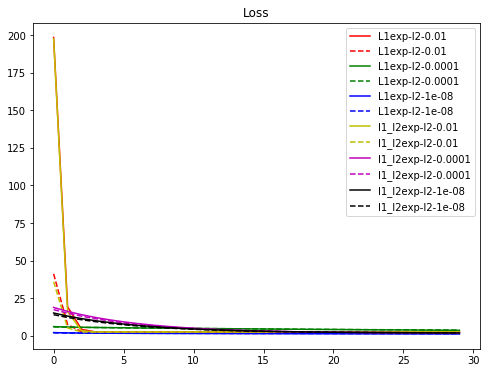

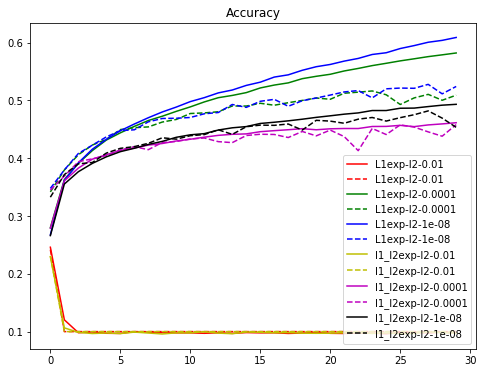

In [60]:
show_history(results)

In [61]:
results

{'L1exp-l2-0.01': {'train-loss': [198.56349536865235,
   19.167979625854493,
   4.16148926902771,
   2.4879356900787353,
   2.462603299484253,
   2.462604264373779,
   2.4625951258087158,
   2.462593759918213,
   2.462599703063965,
   2.462592105255127,
   2.462603620223999,
   2.4626029650878904,
   2.4626096436309814,
   2.4625938760375976,
   2.462600143737793,
   2.4626077017974852,
   2.4625920258331297,
   2.462595606002808,
   2.4625915794372557,
   2.4625928354644775,
   2.462597012786865,
   2.462597292480469,
   2.4625912140655517,
   2.4625968173217774,
   2.462588669128418,
   2.4625949773406983,
   2.4625906311798094,
   2.4625880657958983,
   2.462594669189453,
   2.4625949380493166],
  'valid-loss': [41.14139459838867,
   7.360467851257324,
   2.6599593608856202,
   2.4625272060394288,
   2.4626007720947265,
   2.4626049560546877,
   2.462514488220215,
   2.4624871475219727,
   2.4625396717071535,
   2.4626022285461424,
   2.4625644538879397,
   2.462631548309326,
   2.4

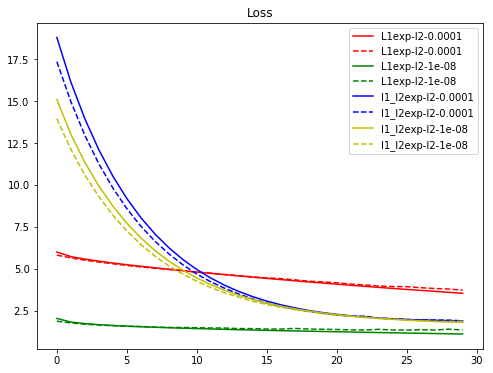

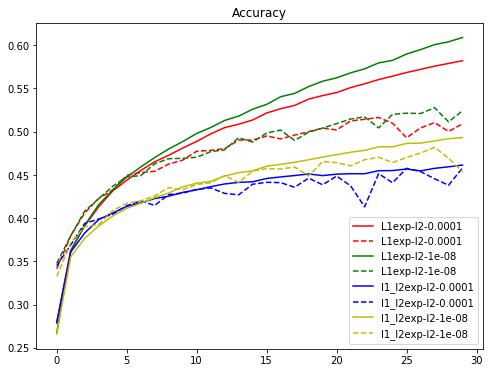

In [63]:
partial_result = {}
for key, value in results.items():
    if(key != 'L1exp-l2-0.01' and key != 'l1_l2exp-l2-0.01'):
        partial_result[key] = value
show_history(partial_result)   